<a href="https://colab.research.google.com/github/DonRoboto/RandomNumbers/blob/master/CONTINUOUS_RANDOM_VARIATES/distribucion_triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DISTRIBUCION TRIANGULAR

Importamos librerias

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

Definimos variables

In [0]:
a = 0
b = 1
c = 5
J = 0

x = np.linspace(0, 6, 10000)
y = [0] * len(x)

Distribución triangular analítica

In [0]:
for n in range(len(x)):
    
    if a < x[n] and x[n] <= b:
        y[n] = 2*((x[n]-a)/((b-a)*(c-a)))
        
    if b < x[n] and x[n] <= c:
        y[n] = 2*((x[n]-c)/((b-c)*(c-a)))

Simulaciones para generar la distribución triangular con base en numeros aleatorios con distribucion uniforme

In [0]:
num_simulaciones = 500000
data = []

for k in range(num_simulaciones):
    u = np.random.uniform(0,1)
    u2 = np.random.uniform(0,1)
    
    if u <= ((b - a)/(c-a)):
        J = 1
    else: 
        J = 2
        
    if J == 1:
        u_aux = a + math.sqrt(u2) * (b - a) 
    else: 
        u_aux = c - math.sqrt(u2) * (c - b) 
        
    data.append(u_aux)

Graficamos y comparamos ambas distribuciones

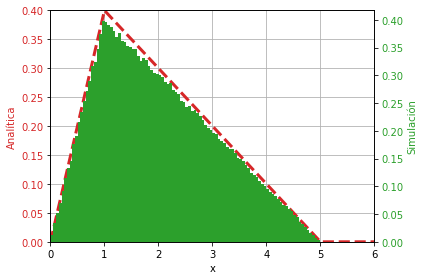

In [5]:
fig, ax1 = plt.subplots()
plt.grid(True)
plt.ylim(top=0.4)
plt.ylim(bottom=0)


color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('Analítica', color=color)
ax1.plot(x, y, 'r--', color=color, linewidth=3.0)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 6)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Simulación', color=color)  
ax2.hist(data,bins=100, color=color,density=True)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()